# P2M1

### NAME : IQBAL JANITRA

### BATCH : 003

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import xgboost as xgb
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from sklearn.pipeline import Pipeline
from phik import resources, report
from phik.report import plot_correlation_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.compose import ColumnTransformer
import keras
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings(action='ignore')

# PROBLEM STATEMENT

We need to predict the `churn_risk_score` of internet provider customers based on their `demographic and transactional information`. The goal is to use this information to build a `model` that can accurately predict whether a customer is at `risk of churning or not`. This information can then be used by the internet provider to take proactive measures to retain their customers and reduce the churn rate. the model's accuracy will be evaluated based on its ability to correctly predict the churn risk score of customers. The model's performance will be crucial in helping the internet provider identify the factors that contribute the most to customer churn and make data-driven decisions to improve customer retention. This can lead to an increase in customer satisfaction, loyalty, and overall business growth for the internet provider. The model will also help the internet provider to `prioritize their retention efforts` based on the `churn risk score` of individual customers and allocate resources accordingly.

# DATA LOADING

In [2]:
df = pd.read_csv ('churn.csv')

In [3]:
df

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


### DATA INFORMATION

`user_id`   ID of a customer

`age`	Age of a customer

`gender`	Gender of a customer

`region_category`	Region that a customer belongs to

`membership_category`	Category of the membership that a customer is using

`joining_date`	Date when a customer became a member

`joined_through` referral	Whether a customer joined using any referral code or ID

`preferred_offer` types	Type of offer that a customer prefers

`medium_of` operation	Medium of operation that a customer uses for transactions

`internet_option`	Type of internet service a customer uses

`last_visit_time`	The last time a customer visited the website

`days_since_last_login`	Number of days since a customer last logged into the website

`avg_time_spent`	Average time spent by a customer on the website

`avg_transaction_value`	Average transaction value of a customer

`avg_frequency_login_days`	Number of times a customer has logged in to the website

`points_in_wallet`	Points awarded to a customer on each transaction

`used_special_discount`	Whether a customer uses special discounts offered

`offer_application_preference`	Whether a customer prefers offers

`past_complaint`	Whether a customer has raised any complaints

`complaint_status`	Whether the complaints raised by a customer was resolved

`feedback`	Feedback provided by a customer

`churn_risk_score`	Churn score 

0 : Not churn 
1 : Churn

In [4]:
df.shape

(37010, 22)

In [5]:
df['days_since_last_login'].unique()

array([   4,   11,    8,   10,    9,   20,    3,    5,    2,   14,   12,
         19,   17,    7,   13,   15,    6,   22,   16,   18,   25, -999,
         24,   23,    1,   21,   26])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

In [7]:
df.nunique()

user_id                         36992
age                                55
gender                              2
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             2
preferred_offer_types               3
medium_of_operation                 3
internet_option                     3
last_visit_time                 30101
days_since_last_login              27
avg_time_spent                  24243
avg_transaction_value           36894
avg_frequency_login_days          971
points_in_wallet                23564
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    2
dtype: int64

# DATA CLEANING

### Drop Unused coloumns

 To prepare the data for modeling, the user_id, joining_date, last_visit_time, and days_since_last_login columns were dropped as they were deemed irrelevant for the prediction task. The ultimate goal is to build a model that can accurately predict the churn risk score and help the internet provider improve customer retention and satisfaction.

In [8]:
df.drop(columns =['user_id','joining_date','last_visit_time','days_since_last_login'],axis=1, inplace= True)

### Handling Missing Value

To ensure the data quality and reliability, the missing values were dropped from the data using the df.dropna() method. This helps to avoid any biases or inaccuracies that may result from imputing or removing missing values. Dropping missing values ensures that the model is trained on clean and complete data, leading to more accurate predictions.

In [9]:
df.isnull().sum()

age                                0
gender                            59
region_category                 5431
membership_category                0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [10]:
df.dropna(inplace=True)

### Handling Duplicated Data

any duplicate rows in the data were removed using the df.drop() method with the argument df[df.duplicated()].index. This helps to eliminate any duplicates that may have been introduced due to data entry errors or other reasons

In [11]:
df.duplicated().value_counts()

False    22853
True        11
dtype: int64

In [12]:
df.drop(df[df.duplicated()].index, inplace=True)
# Reset the index
df.reset_index(drop=True)

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,63,F,Village,No Membership,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,56.67,15678.14,11.0,590.220000,No,Yes,No,Not Applicable,Too many ads,1
1,15,M,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,34.07,9151.14,29.0,655.430000,Yes,No,No,Not Applicable,No reason specified,1
2,35,F,Town,Basic Membership,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,106.23,28232.59,16.0,984.933920,No,Yes,No,Not Applicable,Too many ads,1
3,33,M,Town,Platinum Membership,No,Gift Vouchers/Coupons,Desktop,Fiber_Optic,74.38,23695.52,0.0,832.420000,Yes,No,Yes,Unsolved,Reasonable Price,0
4,36,F,City,Gold Membership,No,Without Offers,Desktop,Wi-Fi,31.39,76602.41,8.0,763.820000,Yes,No,No,Not Applicable,Reasonable Price,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22848,25,F,Town,No Membership,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,119.83,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
22849,42,F,Town,Basic Membership,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,529.58,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
22850,19,F,Town,Gold Membership,Yes,Without Offers,Smartphone,Fiber_Optic,119.96,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
22851,27,F,City,Gold Membership,Yes,Without Offers,Desktop,Wi-Fi,368.50,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0


# EXPLORATORY DATA ANLYSIS

Now we do the `exploratory data analysis` is to gain insights into the data and identify the factors that contribute to customer churn. The EDA will help to understand the relationships between different variables and the target variable `churn_risk_score`. The insights obtained from the EDA will be used to build an effective model that can accurately predict the churn risk score of customers. The insights and visualizations generated during the EDA process can also be used to identify trends, patterns, and correlations in the data, which can help to inform business decisions and improve customer retention strategies.

During the EDA, the relationships between the features and the target variable can be analyzed and evaluated, and the most relevant and influential features can be selected for the model building. By carefully selecting the right features, the model can be made more effective and accurate, leading to better predictions. This can also help to avoid overfitting, reduce the complexity of the model, and improve its interpretability. The selected features should have a strong relationship with the target variable, be free from multicollinearity, and be independent of each other. The EDA helps to make informed decisions about feature selection, which is critical for building an effective predictive model.

### Age

the age of the customers in the data ranges from 10 to 64 years old, with an average age of 37 years. This information gives a general overview of the age distribution of the customers and can be used as a starting point for further analysis and modeling. Understanding the age distribution can be useful in understanding the behavior and preferences of different age groups and developing targeted marketing and retention strategies.

In [13]:
print("Oldest:", df['age'].max())
print("Youngest:", df['age'].min())
print("Avarage Age:",df['age'].mean())


Oldest: 64
Youngest: 10
Avarage Age: 36.988885485494244


This histogram gives a visual representation of the distribution of the average time spent by customers on the website. The height of each bar represents the number of customers whose average time spent falls within a particular range. This plot can be used to identify any patterns

majority of customers have an average time spent on the website that is below the median. This indicates that there may be a decrease in the average time spent by customers on the internet.

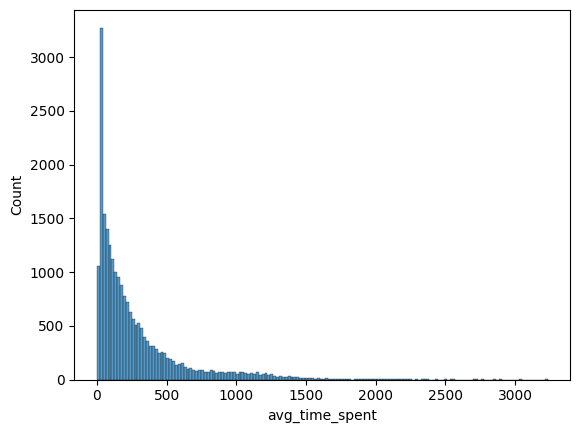

In [14]:
sns.histplot(df["avg_time_spent"])
plt.show()

This histogram gives a visual representation of the distribution of the average transaction value of the customers. The height of each bar represents the number of customers whose average transaction value falls within a particular range. and the result 

we can see that the majority of customers have an average transaction value below 45000. There is a relatively lower count of customers with an average transaction value above 45000. This indicates that the majority of customers tend to make transactions with lower values. On the other hand, there is a relatively smaller group of customers who make transactions with higher values. This information can be used to segment the customers based on their spending behavior and to develop targeted marketing strategies to increase the average transaction value.

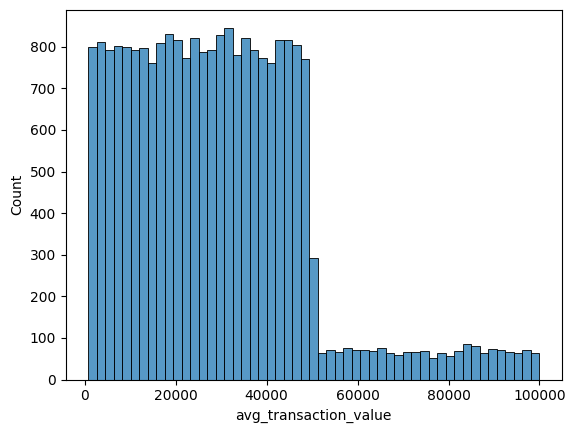

In [15]:
sns.histplot(df["avg_transaction_value"])
plt.show()

This count plot gives a visual representation of how many customers joined through referrals and how many joined without referrals.
the result show that there is roughly equal distribution of customers who joined through referrals and customers who joined without referrals.

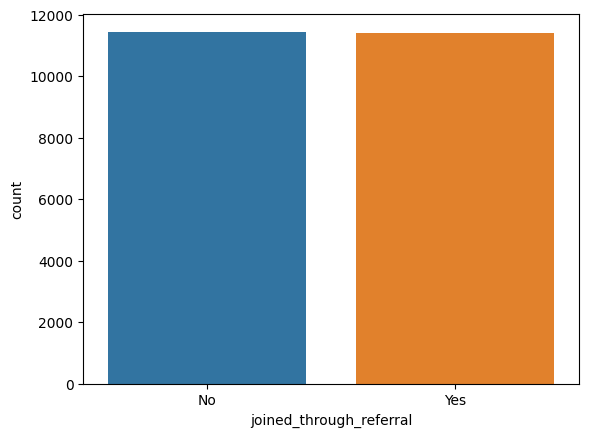

In [16]:
sns.countplot(x="joined_through_referral", data=df)
plt.show()

If there are more customers who have "yes" as their preference, it indicates that customers generally prefer offers and discounts. This information can be useful in determining the effectiveness of offering discounts to customers and how it affects customer loyalty. this suggests that a higher proportion of customers prefer offers and discounts. This information can be used by the internet provider to determine the effectiveness of offering discounts to customers and how it affects customer loyalty.

The results show that gender and age does not have a significant impact on the preference for offers and discounts.

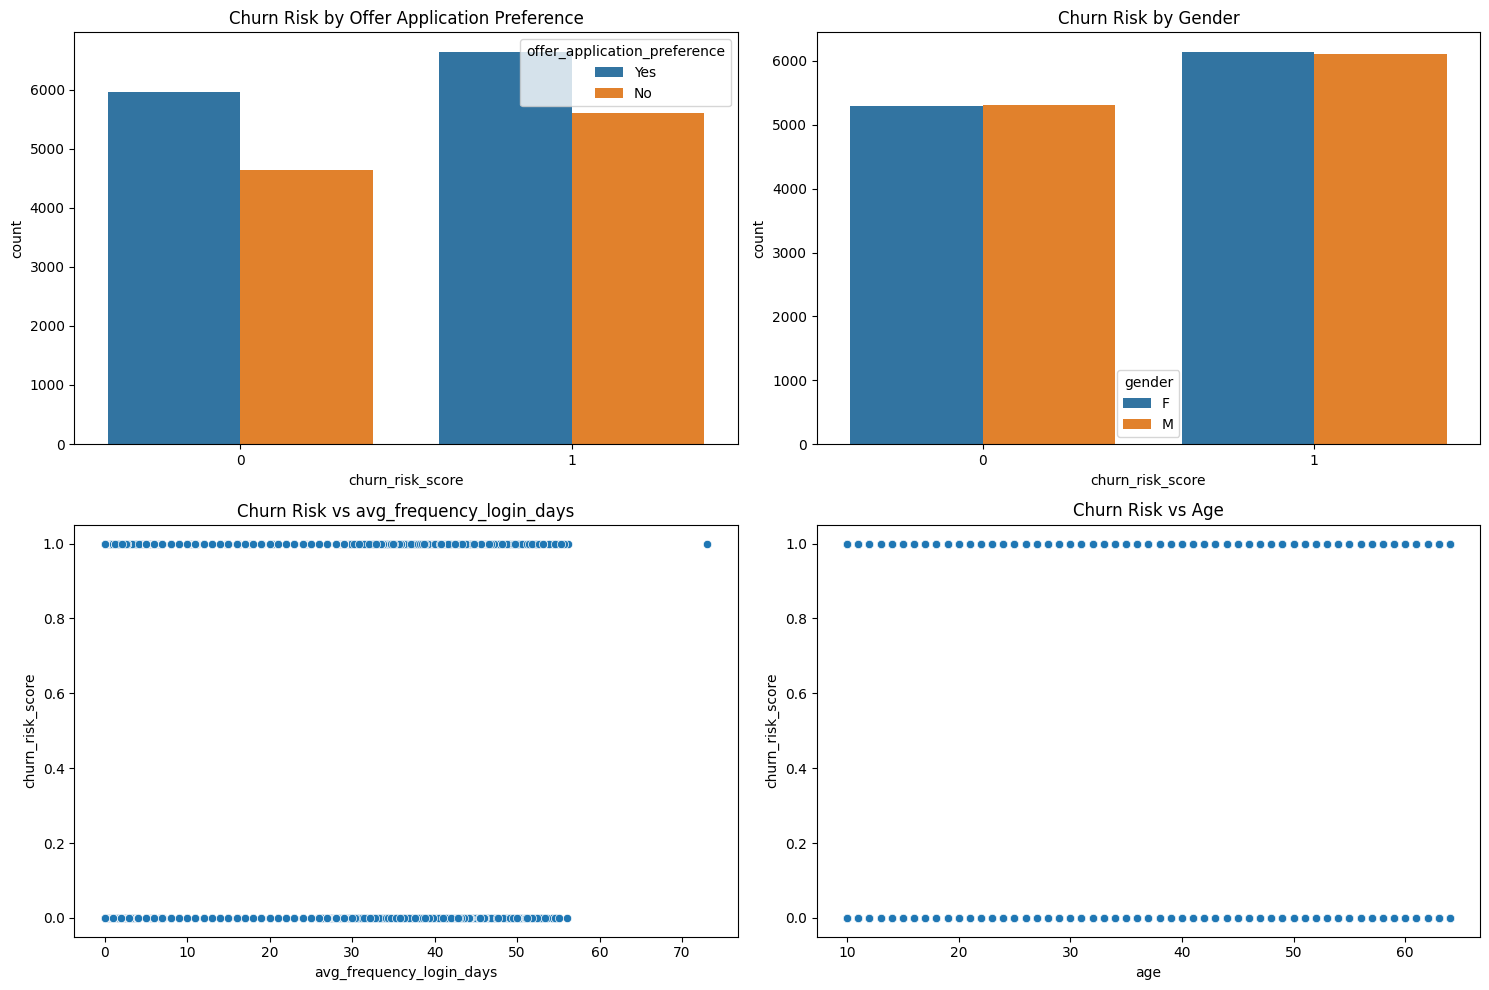

In [17]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(x="churn_risk_score", hue="offer_application_preference", data=df)
plt.title("Churn Risk by Offer Application Preference")

plt.subplot(2, 2, 2)
sns.countplot(x="churn_risk_score", hue="gender", data=df)
plt.title("Churn Risk by Gender")

plt.subplot(2, 2, 3)
sns.scatterplot(x="avg_frequency_login_days", y="churn_risk_score", data=df)
plt.title("Churn Risk vs avg_frequency_login_days")

plt.subplot(2, 2, 4)
sns.scatterplot(x="age", y="churn_risk_score", data=df)
plt.title("Churn Risk vs Age")

plt.tight_layout()
plt.show()


based on the pie charts, feedback, membership category, and internet option do have some impact on the churn risk score. However, the results show that there is not a significant difference between the different options within each feature. For example, feedback options such as "too many ads," "poor website," and "poor customer service" all have a similar risk for churn. Additionally, both gold and silver membership categories have a lower risk for churn compared to basic or no membership. Finally, the risk for churn is similar among the different internet options such as fiber optic, wifi, or mobile data.

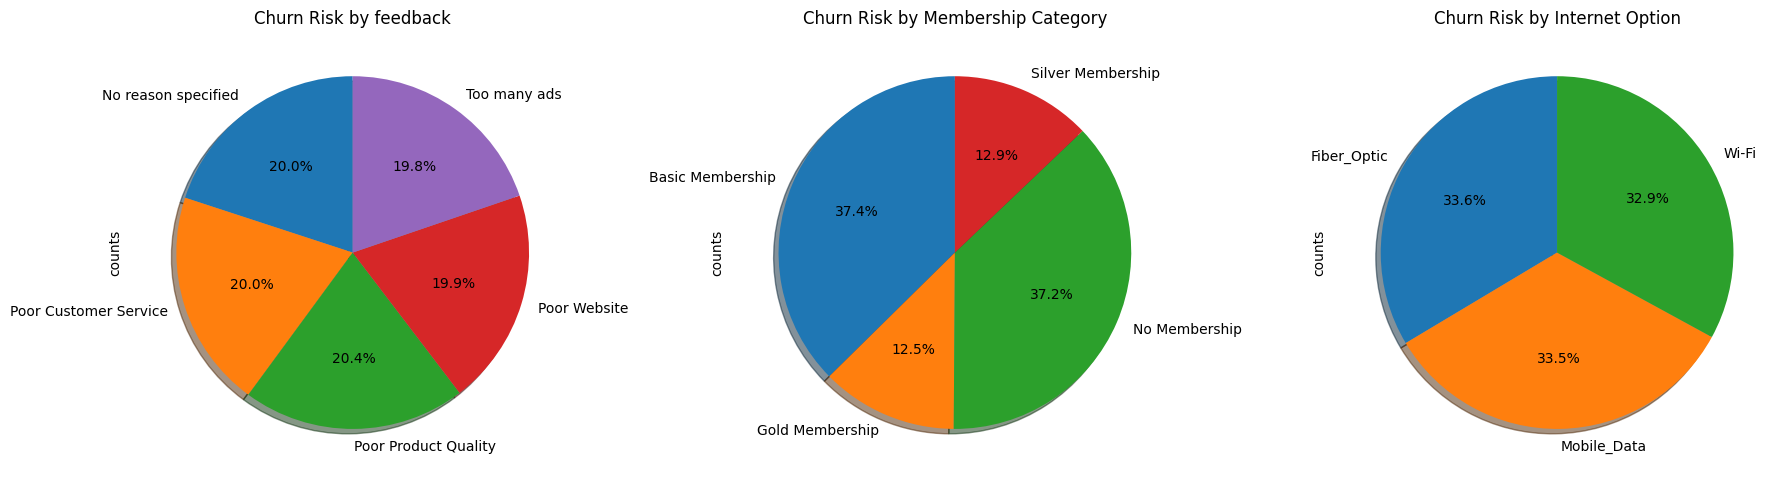

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

df_temp = df[['feedback', 'churn_risk_score']].groupby(['feedback', 'churn_risk_score']).size().reset_index(name='counts')
df_temp = df_temp[df_temp['churn_risk_score']==1]
df_temp = df_temp.set_index('feedback')
df_temp.plot.pie(y='counts', legend=False, autopct='%1.1f%%', shadow=True, startangle=90, ax=ax[0])
ax[0].set_title("Churn Risk by feedback")

df_temp = df[['membership_category', 'churn_risk_score']].groupby(['membership_category', 'churn_risk_score']).size().reset_index(name='counts')
df_temp = df_temp[df_temp['churn_risk_score']==1]
df_temp = df_temp.set_index('membership_category')
df_temp.plot.pie(y='counts', legend=False, autopct='%1.1f%%', shadow=True, startangle=90, ax=ax[1])
ax[1].set_title("Churn Risk by Membership Category")

df_temp = df[['internet_option', 'churn_risk_score']].groupby(['internet_option', 'churn_risk_score']).size().reset_index(name='counts')
df_temp = df_temp[df_temp['churn_risk_score']==1]
df_temp = df_temp.set_index('internet_option')
df_temp.plot.pie(y='counts', legend=False, autopct='%1.1f%%', shadow=True, startangle=90, ax=ax[2])
ax[2].set_title("Churn Risk by Internet Option")

plt.tight_layout()
plt.show()


In [19]:
#sns.pairplot(df, hue="churn_risk_score")
#plt.show()

on correlation, we can look at the correlation between the features and the target variable, churn_risk_score, to determine the strength of the relationship between them. A high positive correlation means that as the value of one feature increases, the value of the target variable increases, and a high negative correlation means that as the value of one feature increases, the value of the target variable decreases.

We can use the seaborn library to plot a heatmap of the correlation between the features and the target variable. The heatmap will show the correlation values in a color-coded format, with darker colors indicating a stronger correlation.

interval columns not set, guessing: ['age', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


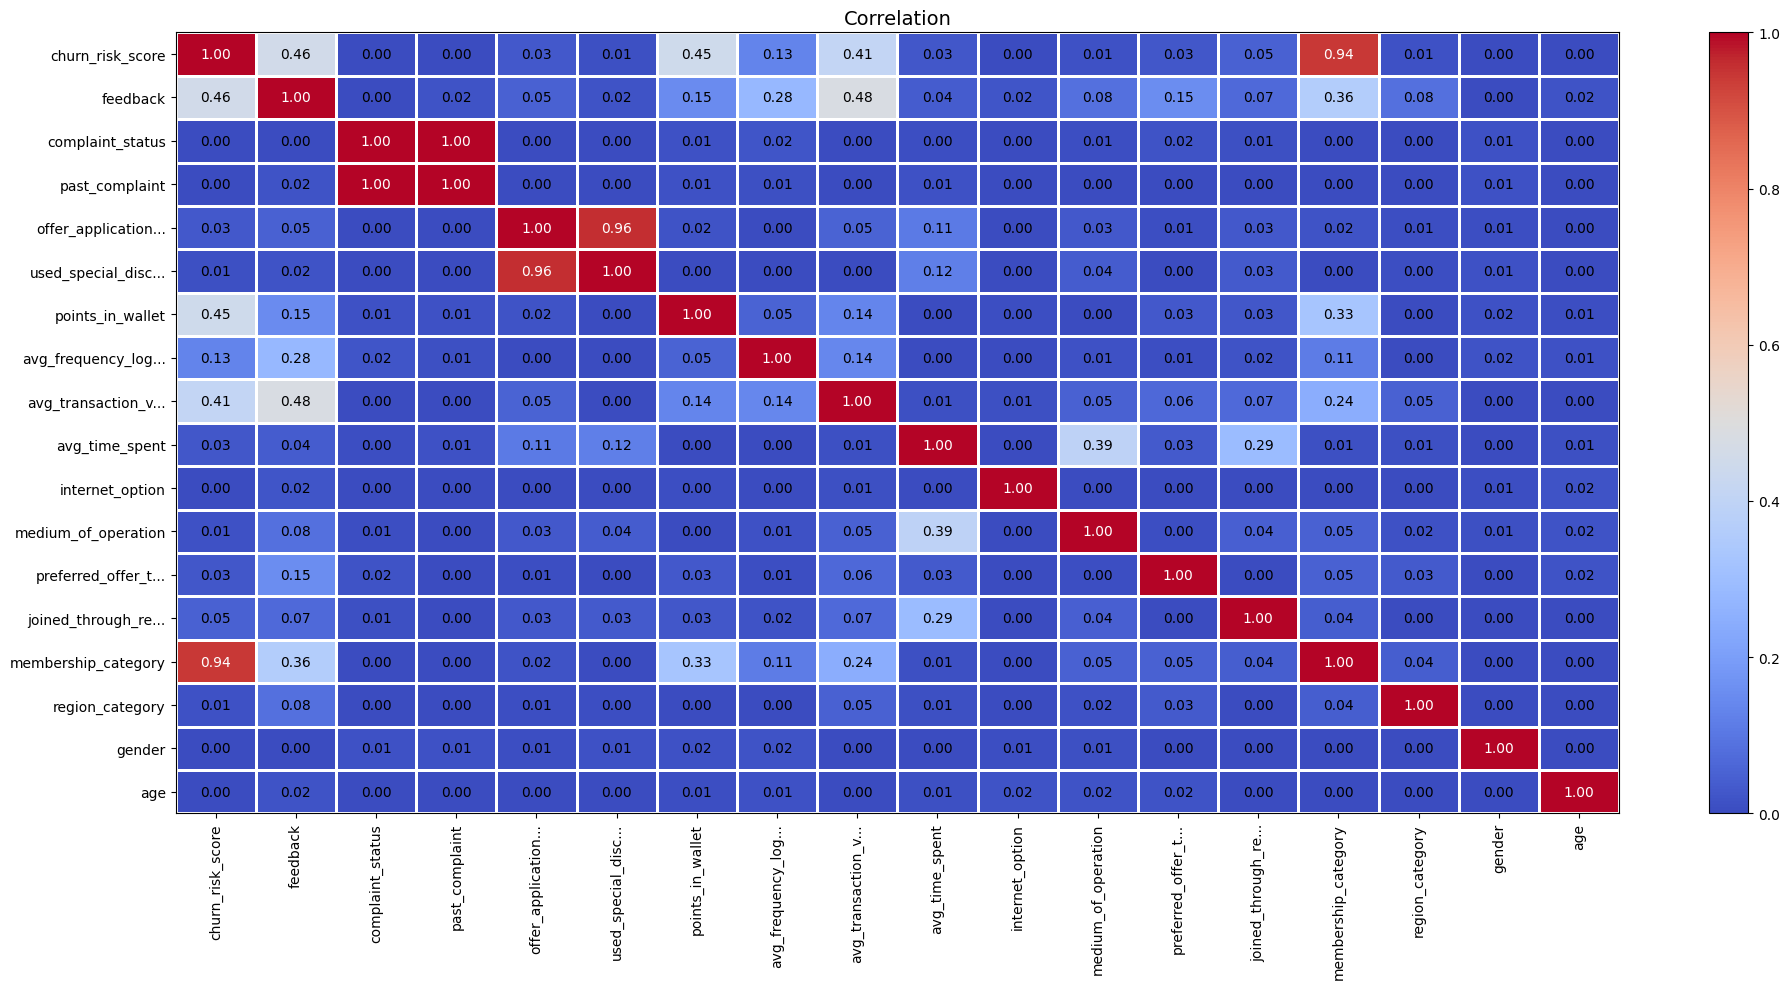

In [20]:
phik_corr = df.phik_matrix()

plot_correlation_matrix(phik_corr.values, 
                        x_labels=phik_corr.columns, 
                        y_labels=phik_corr.index, 
                        vmin=0, vmax=1, color_map='coolwarm', 
                        title=r'Correlation', 
                        figsize=(20,10))
plt.show()

In [21]:
df.phik_matrix().churn_risk_score.sort_values(ascending=False) 

interval columns not set, guessing: ['age', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


churn_risk_score                1.000000
membership_category             0.941939
feedback                        0.456001
points_in_wallet                0.446729
avg_transaction_value           0.409086
avg_frequency_login_days        0.130753
joined_through_referral         0.049069
offer_application_preference    0.029454
avg_time_spent                  0.026375
preferred_offer_types           0.025170
medium_of_operation             0.014012
region_category                 0.013638
used_special_discount           0.008745
internet_option                 0.000000
gender                          0.000000
past_complaint                  0.000000
complaint_status                0.000000
age                             0.000000
Name: churn_risk_score, dtype: float64

From the feature importance values, we can see that membership_category, feedback, points_in_wallet, and avg_transaction_value are the most important features in predicting the churn risk score. This means that these features have the most impact on the prediction and can be used to build a strong model. On the other hand, avg_time_spent, preferred_offer_types, and offer_application_preference are the least important features, which have a very little impact on the prediction. To get a better prediction result, these features may not be used, or only used after some feature engineering has been done.

and the corelation shows that membership category has a high positive correlation with the churn risk score (0.94). Feedback also has a positive correlation with the churn risk score (0.46). Points in wallet and average transaction value also have a positive correlation with the churn risk score (0.45 and 0.41 respectively). However, the correlation of the other features (joined through referral, offer application preference, average time spent, and preferred offer types) with the churn risk score is relatively low (0.049, 0.029, 0.026, and 0.025 respectively). This suggests that membership category, feedback, points in wallet, and average transaction value

# FEATURES ENGINEERING

### Split between `X` (Features) and `Y` (Target), and split between Train-Set and Test-Set

splitting a data into training and test sets for a machine learning model. The data has a column `churn_risk_score`, which is being removed from the feature set (x) and stored as the target variable (y). The `train_test_split` function is then used to split the data into a training set `x_train, y_train` and a test set `x_test, y_test`

In [22]:
x = df.drop('churn_risk_score', axis=1)
y = df['churn_risk_score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print('X Train Size : ', x_train.shape)
print('X Test Size  : ', x_test.shape)
print('')
print('Y Train Size : ', y_train.shape)
print('Y Test Size : ', y_test.shape)

X Train Size :  (15997, 17)
X Test Size  :  (6856, 17)

Y Train Size :  (15997,)
Y Test Size :  (6856,)


the features that have a strong positive correlation with the target variable "churn_risk_score" are "membership_category" (0.94), "feedback" (0.46), "points_in_wallet" (0.45), and "avg_transaction_value" (0.41). The rest of the features have a weaker correlation and may not contribute much to the predictive power of the model.

In [23]:
catcol = ['membership_category','feedback','joined_through_referral','offer_application_preference','preferred_offer_types']
numcol = ['points_in_wallet','avg_transaction_value','avg_frequency_login_days','avg_time_spent']

creating separate DataFrames for the numerical and categorical features in the training set `X_train_num` and `X_train_cat` and the test set `X_test_num` and `X_test_cat` by indexing the original DataFrames `x_train` and `x_test`

In [24]:
X_train_num = x_train[numcol]
X_train_cat = x_train[catcol]

X_test_num = x_test[numcol]
X_test_cat = x_test[catcol]

combines all of the selected `numerical and categorical` features into a single DataFrame that can be used as input for a `machine learning model`. It is creating a dataframe with all the selected features `numerical and categorical` that can be used to train a model. Also, it is creating the dataframe which is used for training the model.

In [25]:
X_train_full = pd.concat([X_train_num, X_train_cat], axis=1)
X_train_full

,points_in_wallet,avg_transaction_value,avg_frequency_login_days,avg_time_spent,membership_category,feedback,joined_through_referral,offer_application_preference,preferred_offer_types
4035,712.340000,37752.38,18.0,79.35,Silver Membership,Poor Customer Service,Yes,No,Gift Vouchers/Coupons
17155,806.076246,21387.74,26.0,32.29,Basic Membership,No reason specified,Yes,No,Gift Vouchers/Coupons
31676,74.479630,39154.64,18.0,1503.76,No Membership,Too many ads,Yes,Yes,Credit/Debit Card Offers
4732,620.730000,27539.27,23.0,170.56,No Membership,Too many ads,Yes,Yes,Credit/Debit Card Offers
893,792.430000,19818.91,0.0,65.93,Silver Membership,Poor Product Quality,No,No,Without Offers
...,...,...,...,...,...,...,...,...,...
21265,703.470000,43683.35,28.0,90.14,Gold Membership,Poor Product Quality,Yes,No,Credit/Debit Card Offers
31903,1192.768647,11838.21,13.0,139.51,Premium Membership,Reasonable Price,Yes,No,Credit/Debit Card Offers
15971,420.415274,9458.45,27.0,189.28,Basic Membership,Poor Website,No,Yes,Without Offers
17539,730.500000,84245.80,17.0,1410.52,Gold Membership,Reasonable Price,Yes,Yes,Gift Vouchers/Coupons


# EDA Modeling

To perform EDA modeling with feature engineering, we will follow these steps:

`Handle Outliers` We can handle outliers by using techniques such as capping and flooring, Winsorizing, and Log Transformation.

`Feature Scaling` We will scale the numerical variables using methods such as Standard Scaler or MinMax Scaler.

`Encoding Categorical Variables` We will encode the categorical variables using one-hot encoding, label encoding, or ordinal encoding.

By performing these steps, we will be able to prepare the data for modeling and increase the accuracy of our model. Is an important step in the machine learning process. By performing EDA, we can understand the characteristics of the data, handle outliers, scale the features, and encode the categorical variables. first we concat numerical and categorical for eda modeling

In [26]:
df_eda = pd.concat([X_train_num, X_train_cat], axis=1)
df_eda.shape

(15997, 9)

### Outliers Handling

The skewness of each feature can be seen in the title of each plot. Skewness measures the asymmetry of the distribution of the data around its mean. A value of 0 indicates a symmetrical distribution while a positive value indicates a right-skewed distribution and a negative value indicates a left-skewed distribution. It is important to handle outliers and correct skewness before modeling as it can affect the performance and accuracy of the model.

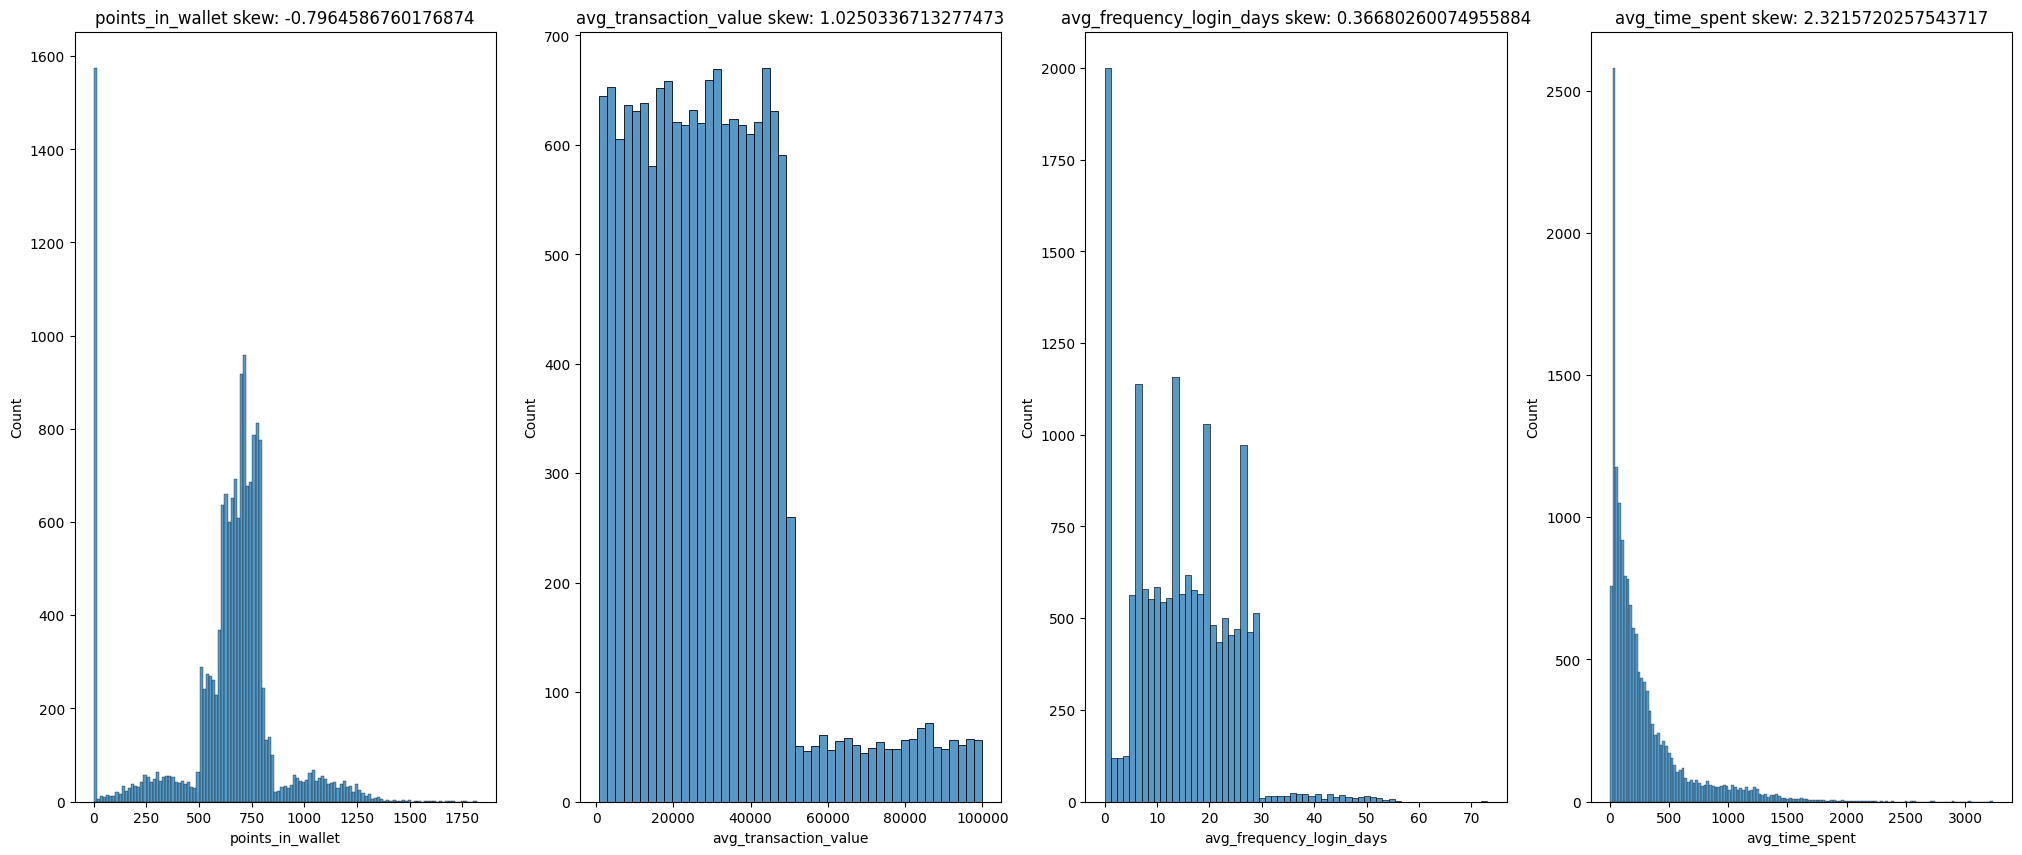

In [27]:
fig, ax = plt.subplots(ncols=4, figsize=[25,10])
ax = ax.flatten()

for idx, col in enumerate(numcol):
    sns.histplot(df_eda[col], ax=ax[idx])
    ax[idx].set_title(f'{numcol[idx]} skew: {df_eda[col].skew()}')

The diagnostic plot can be useful to detect outliers in a visual manner. The histogram shows the distribution of the data and the boxplot shows the median, quartiles, and outliers of the data. The outliers are usually shown as dots outside the whiskers in the boxplot. By comparing the histogram and boxplot, we can identify if there are any values that are significantly different from the majority of the data and if they need to be handled.

In [28]:
def diagnostic_plots(x_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(x_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=x_train[variable])
    plt.title('Boxplot')

    plt.show()

In [29]:
Q3 = df_eda['points_in_wallet'].quantile(.75)
Q1 = df_eda['points_in_wallet'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = df_eda[(df_eda['points_in_wallet'] > upper) | (df_eda['points_in_wallet'] < lower)]
print('points_in_wallet Outliers')
print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df_eda.shape[0] * 100, '%')

points_in_wallet Outliers
count of outlier:  2834
percentage of outlier:  17.71582171657186 %


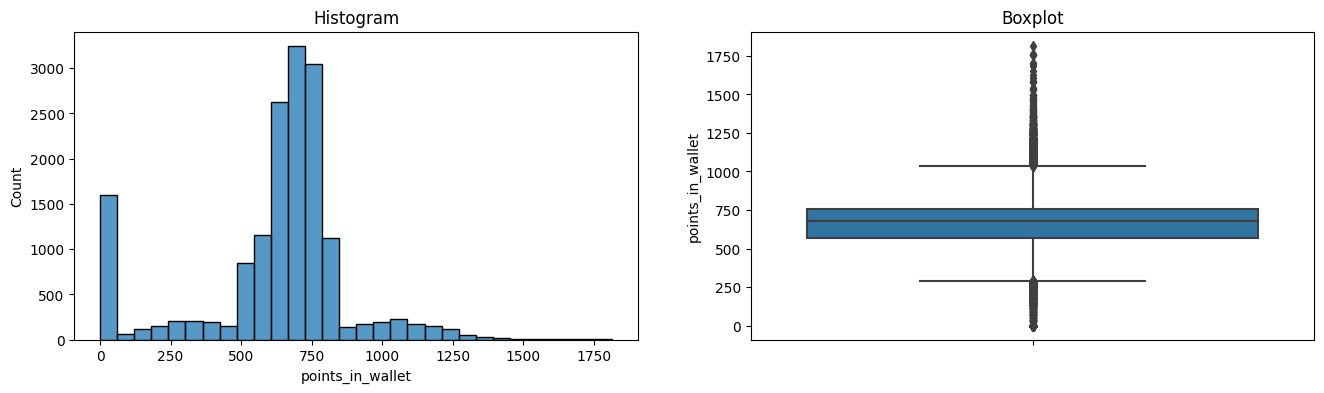

In [30]:
diagnostic_plots(x_train, 'points_in_wallet')

Based on the diagnostic plot, it is concluded that the avg_transaction_value feature has 3.2193536288054014% outliers. and we dont want to handle it because the number of outliers is relatively small compared to the total number of samples, and their impact on the model may not be significant.

In [31]:
Q3 = df_eda['avg_transaction_value'].quantile(.75)
Q1 = df_eda['avg_transaction_value'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = df_eda[(df_eda['avg_transaction_value'] > upper) | (df_eda['avg_transaction_value'] < lower)]
print('avg_transaction_value Outliers')
print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df_eda.shape[0] * 100, '%')

avg_transaction_value Outliers
count of outlier:  515
percentage of outlier:  3.2193536288054014 %


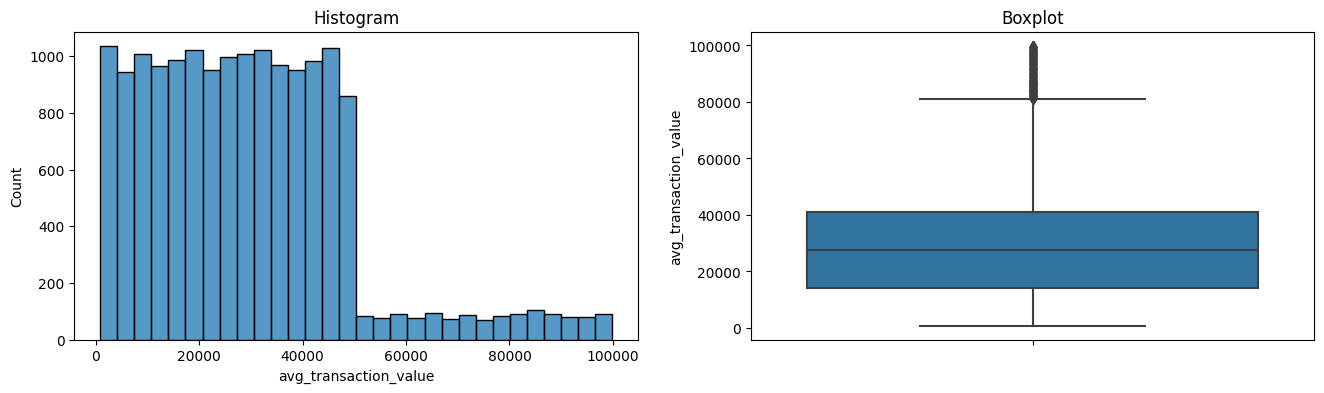

In [32]:
diagnostic_plots(x_train, 'avg_transaction_value')

In [33]:
Q3 = df_eda['avg_frequency_login_days'].quantile(.75)
Q1 = df_eda['avg_frequency_login_days'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = df_eda[(df_eda['avg_frequency_login_days'] > upper) | (df_eda['avg_frequency_login_days'] < lower)]
print('avg_frequency_login_days Outliers')
print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df_eda.shape[0] * 100, '%')

avg_frequency_login_days Outliers
count of outlier:  107
percentage of outlier:  0.6688754141401513 %


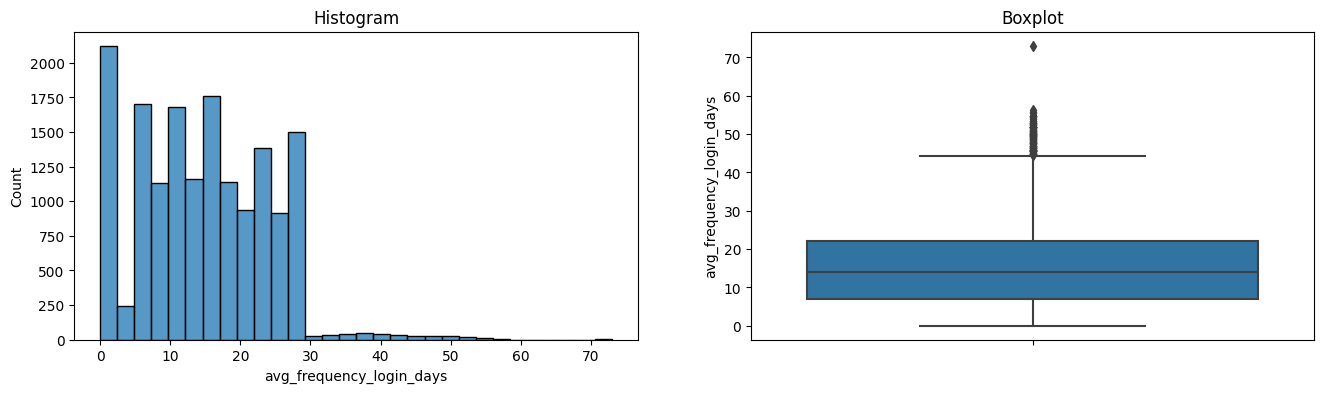

In [34]:
diagnostic_plots(x_train, 'avg_frequency_login_days')

In [35]:
Q3 = df_eda['avg_time_spent'].quantile(.75)
Q1 = df_eda['avg_time_spent'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = df_eda[(df_eda['avg_time_spent'] > upper) | (df_eda['avg_time_spent'] < lower)]
print('avg_time_spent Outliers')
print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df_eda.shape[0] * 100, '%')

avg_time_spent Outliers
count of outlier:  1398
percentage of outlier:  8.739138588485341 %


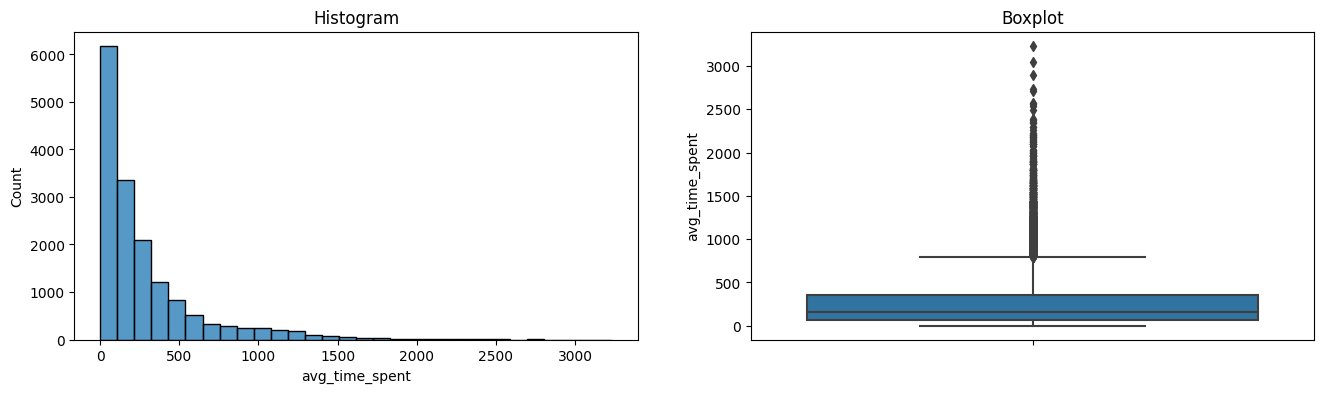

In [36]:
diagnostic_plots(x_train, 'avg_time_spent')

In [37]:
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                         tail='both', # cap left, right or both tails 
                         fold=1.5,
                         variables=['points_in_wallet'])

windsoriser.fit(df_eda)

df_eda_capp = windsoriser.transform(df_eda)

In [38]:
df_eda_capp

,points_in_wallet,avg_transaction_value,avg_frequency_login_days,avg_time_spent,membership_category,feedback,joined_through_referral,offer_application_preference,preferred_offer_types
4035,712.340000,37752.38,18.0,79.35,Silver Membership,Poor Customer Service,Yes,No,Gift Vouchers/Coupons
17155,806.076246,21387.74,26.0,32.29,Basic Membership,No reason specified,Yes,No,Gift Vouchers/Coupons
31676,291.220000,39154.64,18.0,1503.76,No Membership,Too many ads,Yes,Yes,Credit/Debit Card Offers
4732,620.730000,27539.27,23.0,170.56,No Membership,Too many ads,Yes,Yes,Credit/Debit Card Offers
893,792.430000,19818.91,0.0,65.93,Silver Membership,Poor Product Quality,No,No,Without Offers
...,...,...,...,...,...,...,...,...,...
21265,703.470000,43683.35,28.0,90.14,Gold Membership,Poor Product Quality,Yes,No,Credit/Debit Card Offers
31903,1037.620000,11838.21,13.0,139.51,Premium Membership,Reasonable Price,Yes,No,Credit/Debit Card Offers
15971,420.415274,9458.45,27.0,189.28,Basic Membership,Poor Website,No,Yes,Without Offers
17539,730.500000,84245.80,17.0,1410.52,Gold Membership,Reasonable Price,Yes,Yes,Gift Vouchers/Coupons


### FEATURES SCALER

In [39]:
scaler = StandardScaler()

df_eda[numcol] = scaler.fit_transform(df_eda[numcol])
df_eda

,points_in_wallet,avg_transaction_value,avg_frequency_login_days,avg_time_spent,membership_category,feedback,joined_through_referral,offer_application_preference,preferred_offer_types
4035,0.330197,0.428538,0.354662,-0.597635,Silver Membership,Poor Customer Service,Yes,No,Gift Vouchers/Coupons
17155,0.676732,-0.405014,1.196988,-0.737892,Basic Membership,No reason specified,Yes,No,Gift Vouchers/Coupons
31676,-2.027922,0.499964,0.354662,3.647672,No Membership,Too many ads,Yes,Yes,Credit/Debit Card Offers
4732,-0.008478,-0.091679,0.881116,-0.325793,No Membership,Too many ads,Yes,Yes,Credit/Debit Card Offers
893,0.626283,-0.484924,-1.540571,-0.637632,Silver Membership,Poor Product Quality,No,No,Without Offers
...,...,...,...,...,...,...,...,...,...
21265,0.297405,0.730639,1.407570,-0.565476,Gold Membership,Poor Product Quality,Yes,No,Credit/Debit Card Offers
31903,2.106303,-0.891430,-0.171791,-0.418334,Premium Membership,Reasonable Price,Yes,No,Credit/Debit Card Offers
15971,-0.749025,-1.012646,1.302279,-0.270000,Basic Membership,Poor Website,No,Yes,Without Offers
17539,0.397333,2.796734,0.249372,3.369780,Gold Membership,Reasonable Price,Yes,Yes,Gift Vouchers/Coupons


### FEATURES ENCODING

In [40]:
encoder = OrdinalEncoder()
cols = ['joined_through_referral', 'offer_application_preference']
df_eda_encoded = df_eda.copy()
for col in cols:
    df_eda_encoded[col] = encoder.fit_transform(df_eda[[col]])

In [41]:
df_eda_encoded

,points_in_wallet,avg_transaction_value,avg_frequency_login_days,avg_time_spent,membership_category,feedback,joined_through_referral,offer_application_preference,preferred_offer_types
4035,0.330197,0.428538,0.354662,-0.597635,Silver Membership,Poor Customer Service,1.0,0.0,Gift Vouchers/Coupons
17155,0.676732,-0.405014,1.196988,-0.737892,Basic Membership,No reason specified,1.0,0.0,Gift Vouchers/Coupons
31676,-2.027922,0.499964,0.354662,3.647672,No Membership,Too many ads,1.0,1.0,Credit/Debit Card Offers
4732,-0.008478,-0.091679,0.881116,-0.325793,No Membership,Too many ads,1.0,1.0,Credit/Debit Card Offers
893,0.626283,-0.484924,-1.540571,-0.637632,Silver Membership,Poor Product Quality,0.0,0.0,Without Offers
...,...,...,...,...,...,...,...,...,...
21265,0.297405,0.730639,1.407570,-0.565476,Gold Membership,Poor Product Quality,1.0,0.0,Credit/Debit Card Offers
31903,2.106303,-0.891430,-0.171791,-0.418334,Premium Membership,Reasonable Price,1.0,0.0,Credit/Debit Card Offers
15971,-0.749025,-1.012646,1.302279,-0.270000,Basic Membership,Poor Website,0.0,1.0,Without Offers
17539,0.397333,2.796734,0.249372,3.369780,Gold Membership,Reasonable Price,1.0,1.0,Gift Vouchers/Coupons


# PREPROCESS

The pipeline consists of one step, which is using an OrdinalEncoder object to encode the categorical data from the columns "joined_through_referral" and "offer_application_preference" in the training set X_train_full

In [42]:
cat_1_pipeline = Pipeline([
        ('encoder', OrdinalEncoder())
    ],
    )

cat_1_tr = cat_1_pipeline.fit_transform(X_train_full[['joined_through_referral', 'offer_application_preference']])
cat_1_tr

array([[1., 0.],
       [1., 0.],
       [1., 1.],
       ...,
       [0., 1.],
       [1., 1.],
       [0., 1.]])

a pipeline named "cat_2_pipeline" using the Pipeline class from scikit-learn. The pipeline consists of one step, which is using a OneHotEncoder object to encode the categorical data from the columns "membership_category", "feedback", and "preferred_offer_types" in the training set X_train_full

In [43]:
cat_2_pipeline = Pipeline([
        ('encoder2', OneHotEncoder())

    ])

cat_2_tr = cat_2_pipeline.fit_transform(X_train_full[['membership_category','feedback','preferred_offer_types']])
cat_2_tr

<15997x18 sparse matrix of type '<class 'numpy.float64'>'
	with 47991 stored elements in Compressed Sparse Row format>

In [44]:
cat_3_pipeline = Pipeline([
        ('outlier', Winsorizer())
    ])

cat_3_tr = cat_3_pipeline.fit_transform(X_train_full[['points_in_wallet']])
cat_3_tr

,points_in_wallet
4035,712.340000
17155,806.076246
31676,74.479630
4732,620.730000
893,792.430000
...,...
21265,703.470000
31903,1192.768647
15971,420.415274
17539,730.500000


In [45]:
 cat_4_pipeline = Pipeline([
        ('scaler', StandardScaler())
    ])

cat_4_tr = cat_4_pipeline.fit_transform(X_train_full[numcol])
cat_4_tr

array([[ 0.33019694,  0.42853782,  0.35466234, -0.5976347 ],
       [ 0.67673231, -0.40501407,  1.19698841, -0.73789217],
       [-2.02792156,  0.49996356,  0.35466234,  3.64767231],
       ...,
       [-0.7490253 , -1.01264627,  1.30227917, -0.26999968],
       [ 0.397333  ,  2.79673401,  0.24937158,  3.36978012],
       [ 0.63811337,  0.83832838,  0.24937158,  0.05921495]])

 ColumnTransformer object named 'preprocessor' that performs transformations on specific columns of a dataset. The 'transformers' argument specifies the transformations that are to be applied to four sets of columns in the dataset: 'joined_through_referral', 'offer_application_preference', 'membership_category', 'feedback', 'preferred_offer_types', 'points_in_wallet', and 'numcol'. The first two sets of columns are transformed using the 'cat_1_pipeline' object, the next set is transformed using the 'cat_2_pipeline' object, the third set is transformed using the 'cat_3_pipeline' object, and the last set is transformed using the 'cat_4_pipeline' object. The 'fit_transform' method is then called on the preprocessor object using the 'X_train_full' dataset, resulting in the transformed training dataset 'X_train_transformed'.

In [46]:
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', cat_1_pipeline, ['joined_through_referral', 'offer_application_preference']),
        ('encoder2', cat_2_pipeline, ['membership_category','feedback','preferred_offer_types']),
        ('ouliers', cat_3_pipeline, ['points_in_wallet']),
        ('scaler', cat_4_pipeline, numcol)
    ])

X_train_transformed = preprocessor.fit_transform(X_train_full)

In [47]:
preprocessor

ColumnTransformer(transformers=[('encoder',
                                 Pipeline(steps=[('encoder',
                                                  OrdinalEncoder())]),
                                 ['joined_through_referral',
                                  'offer_application_preference']),
                                ('encoder2',
                                 Pipeline(steps=[('encoder2',
                                                  OneHotEncoder())]),
                                 ['membership_category', 'feedback',
                                  'preferred_offer_types']),
                                ('ouliers',
                                 Pipeline(steps=[('outlier', Winsorizer())]),
                                 ['points_in_wallet']),
                                ('scaler',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['points_in_wallet', 'avg_transaction_value',
                                  'avg_frequency_login_days',
                                  'avg_time_spent'])])

 applying a preprocessor, preprocessor, on the test data x_test, and storing the transformed test data in the test_tr variable.

In [48]:
test_tr = preprocessor.transform(x_test)
test_tr

array([[ 0.        ,  0.        ,  0.        , ...,  0.58906312,
         0.98640689,  0.1466896 ],
       [ 1.        ,  1.        ,  0.        , ..., -0.26893456,
         0.03879007,  0.67815396],
       [ 0.        ,  1.        ,  0.        , ..., -0.27599788,
         0.14408083, -0.58896174],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.13361094,
        -0.69824524, -0.74289924],
       [ 1.        ,  1.        ,  0.        , ...,  0.67947124,
        -0.48766373,  0.01638665],
       [ 0.        ,  1.        ,  0.        , ...,  0.70273174,
        -0.27708221,  0.36640445]])

# PIPELINE TENSORFLOW

This pipeline is a TensorFlow data pipeline for a machine learning model. The pipeline consists of three different datasets: train_pipe, test_pipe, and val_pipe. These datasets are created by slicing the training, testing, and validation data respectively, into arrays that can be processed by TensorFlow. The train_pipe dataset is shuffled and divided into batches of 128 and prefetched for improved performance. The test_pipe and val_pipe datasets are divided into batches of 128 for processing. The purpose of these pipelines is to efficiently and effectively feed the machine learning model with the necessary data for training, testing, and validation.

In [49]:
X_valid = test_tr
y_valid = y_test

In [50]:
train_pipe = tf.data.Dataset.from_tensor_slices((X_train_transformed,y_train)).shuffle(1000).batch(128).prefetch(tf.data.AUTOTUNE) 
test_pipe = tf.data.Dataset.from_tensor_slices((test_tr,y_test)).batch(128)
val_pipe = tf.data.Dataset.from_tensor_slices((X_valid,y_valid)).batch(128)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-02-07 14:38:36.964795: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-07 14:38:36.965596: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Early Stoping

In [51]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# MODEL ANN SEQUENTIAL

Lets make the model with three layers - an input layer, a hidden layer, and an output layer. The number of neurons in the hidden layer is calculated based on the formula "hid = int(len(x_train)/(alp*(inp+out)))" where "alp" is set to 10. The activation functions used are 'relu' for the hidden layer and 'sigmoid' for the output layer. The summary of the model can be displayed using the 'model.summary()' function.

In [52]:
alp = 10
inp = X_train_transformed.shape[1]
out = 1
hid = int(len(x_train)/(alp*(inp+out)))
print(f'Jumlah neuron pada hidden layer: {hid}')

model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(inp, activation='relu', input_shape=(inp,),kernel_initializer='random_normal'),
    tf.keras.layers.Dense(hid, activation='relu',kernel_initializer='random_normal'),
    tf.keras.layers.Dense(out, activation='sigmoid')
])


model.summary()

Jumlah neuron pada hidden layer: 61
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                650       
                                                                 
 dense_1 (Dense)             (None, 61)                1586      
                                                                 
 dense_2 (Dense)             (None, 1)                 62        
                                                                 
Total params: 2,298
Trainable params: 2,298
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy','Recall'])

### Model Training

In [54]:
history = model.fit(train_pipe, epochs=20, validation_data=(val_pipe))

Epoch 1/20


2023-02-07 14:38:37.790145: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-07 14:38:37.793792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 0.6905 - accuracy: 0.6088 - recall: 0.6461

2023-02-07 14:38:39.486406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 2s 15ms/step - loss: 0.6905 - accuracy: 0.6088 - recall: 0.6461 - val_loss: 0.5178 - val_accuracy: 0.8156 - val_recall: 0.8450
Epoch 2/20
125/125 [==============================] - 1s 11ms/step - loss: 0.4274 - accuracy: 0.8038 - recall: 0.8357 - val_loss: 0.3608 - val_accuracy: 0.8172 - val_recall: 0.7226
Epoch 3/20
125/125 [==============================] - 1s 11ms/step - loss: 0.3144 - accuracy: 0.8496 - recall: 0.8525 - val_loss: 0.2783 - val_accuracy: 0.8568 - val_recall: 0.7924
Epoch 4/20
125/125 [==============================] - 1s 11ms/step - loss: 0.2938 - accuracy: 0.8570 - recall: 0.8593 - val_loss: 0.2714 - val_accuracy: 0.8476 - val_recall: 0.7706
Epoch 5/20
125/125 [==============================] - 1s 10ms/step - loss: 0.2761 - accuracy: 0.8613 - recall: 0.8653 - val_loss: 0.2601 - val_accuracy: 0.8956 - val_recall: 0.8842
Epoch 6/20
125/125 [==============================] - 1s 10ms/step - loss: 0.2812 - accuracy: 0.8610 - rec

Based on the results you have provided, it seems that the model is improving in terms of accuracy and recall as the number of epochs increases. However, the gap between the training accuracy/recall and validation accuracy/recall is still substantial, indicating that the model is likely overfitting to the training data. and lets improving the model's performance on the validation data would likely require techniques such as regularization by augmenting the training data.

Text(0.5, 0, 'Epoch')

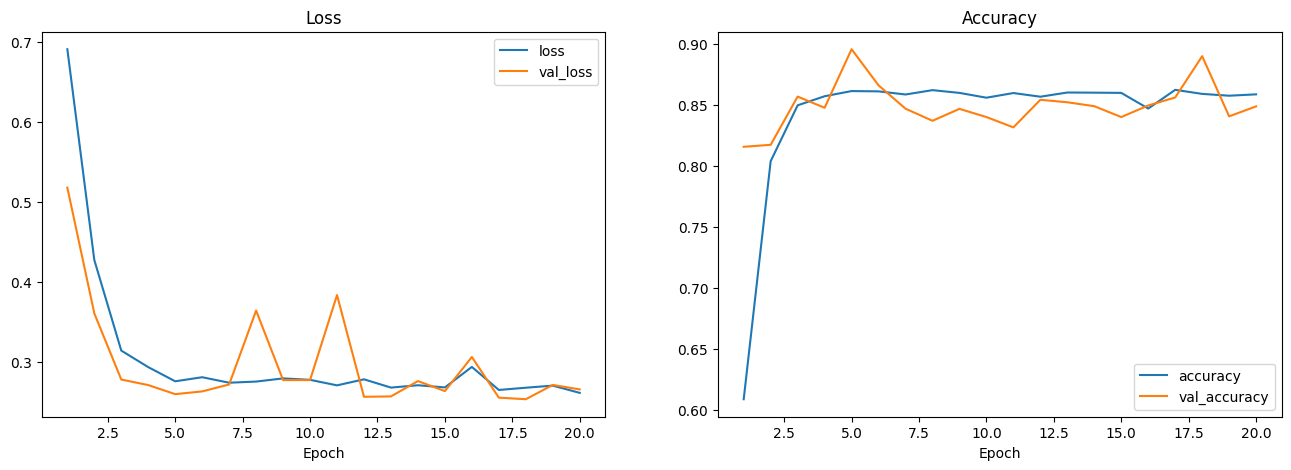

In [55]:
epoch=20

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

# MODEL ANN SEQUENTIAL IMPROVEMENT

lets tune the model with an input layer, 4 hidden layers, and an output layer. The input layer has 25 neurons and the output layer has 1 neuron. The number of neurons in each hidden layer is 7.

The first hidden layer has activation function 'tanh' and the second and third hidden layer also have the same activation function. The final activation function of the output layer is 'sigmoid'. The network has 952 total trainable parameters.

"And for `sigmoid` makes perfect sense if you have an autoencoder for images with pixel values between 0 and 1. It also works for the classification layer in a GAN where you classify images as real or fake (sigmoid gives the probability of each image being real or fake). It’s not the most appropriate choice in all scenarios, and then there are times when it simply won’t make sense at all.
Sigmoid fell out of favor for the hidden layer activations because of the numerical issues associated with gradient descend when using sigmoid or Tanh. That was one of the key successes of AlexNet, and when ReLU really started to take off." source https://www.quora.com/Why-is-it-not-a-good-idea-to-use-a-sigmoid-as-an-activation-function-in-the-output-layer

In [93]:
alp = 10
inp = X_train_transformed.shape[1]
out = 1
hid = int(len(test_tr)/(alp*(inp+out)))
hid2 = hid-22
print(f'Jumlah neuron pada hidden layer: {hid2}')

modelimp= tf.keras.models.Sequential([
    tf.keras.layers.Dense(inp, activation='sigmoid', input_shape=(inp,),kernel_initializer='HeNormal'),
    tf.keras.layers.Dense(hid2, activation='tanh',kernel_initializer='HeNormal'),
    tf.keras.layers.Dense(hid2, activation='tanh',kernel_initializer='normal'),  # additional hidden layer
    tf.keras.layers.Dense(hid2, activation='tanh',kernel_initializer='normal'), # additional hidden layer
    tf.keras.layers.Dense(out, activation='sigmoid')
])

modelimp.summary()


Jumlah neuron pada hidden layer: 4
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 25)                650       
                                                                 
 dense_72 (Dense)            (None, 4)                 104       
                                                                 
 dense_73 (Dense)            (None, 4)                 20        
                                                                 
 dense_74 (Dense)            (None, 4)                 20        
                                                                 
 dense_75 (Dense)            (None, 1)                 5         
                                                                 
Total params: 799
Trainable params: 799
Non-trainable params: 0
_________________________________________________________________


compiles the model "modelimp" with an optimizer "Adam" and a learning rate of 0.0001. The loss function used is "binary_crossentropy" and the evaluation metrics used to monitor the performance of the model are accuracy and recall.

In [94]:
modelimp.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy','Recall'])

### MODEL TRAINING

In [95]:
historyimp = modelimp.fit(train_pipe, epochs=25, validation_data=(val_pipe))

Epoch 1/25


2023-02-07 16:53:35.056473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 0.6919 - accuracy: 0.5361 - recall: 1.0000

2023-02-07 16:53:37.203400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 4s 19ms/step - loss: 0.6919 - accuracy: 0.5361 - recall: 1.0000 - val_loss: 0.6915 - val_accuracy: 0.5353 - val_recall: 1.0000
Epoch 2/25
125/125 [==============================] - 2s 13ms/step - loss: 0.6911 - accuracy: 0.5361 - recall: 1.0000 - val_loss: 0.6907 - val_accuracy: 0.5353 - val_recall: 1.0000
Epoch 3/25
125/125 [==============================] - 2s 13ms/step - loss: 0.6905 - accuracy: 0.5361 - recall: 1.0000 - val_loss: 0.6903 - val_accuracy: 0.5353 - val_recall: 1.0000
Epoch 4/25
125/125 [==============================] - 2s 12ms/step - loss: 0.6901 - accuracy: 0.5361 - recall: 1.0000 - val_loss: 0.6900 - val_accuracy: 0.5353 - val_recall: 1.0000
Epoch 5/25
125/125 [==============================] - 2s 13ms/step - loss: 0.6897 - accuracy: 0.5361 - recall: 1.0000 - val_loss: 0.6894 - val_accuracy: 0.5353 - val_recall: 1.0000
Epoch 6/25
125/125 [==============================] - 2s 12ms/step - loss: 0.6890 - accuracy: 0.5361 - rec

After we do an improvement, loss is a measure of the error in the model's predictions. Lower loss is better, accuracy is the proportion of correct predictions. Higher accuracy is better and recall is the proportion of relevant instances that are retrieved by the model. Higher recall is better.

In this training process, the model's accuracy improved from 53.36% at the beginning to 85.38% by the end. The recall improved from 0.9748 to 0.8612. The validation loss and accuracy also improved over time, indicating that the model is learning from the training data and generalizing well to new data.

And tuning involves adjusting these hyperparameters to optimize the performance of the model. The output you provided shows the results of training the model with different hyperparameter values, and it appears that the model's performance improved as the number of epochs increased, as indicated by the increase in accuracy and recall over time.

Text(0.5, 0, 'Epoch')

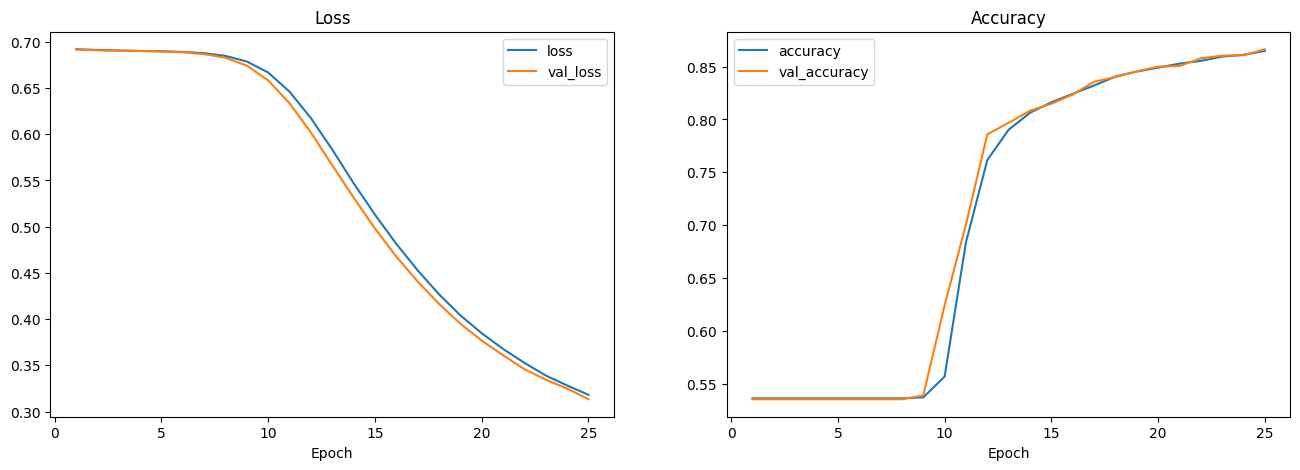

In [96]:
epoch=25

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),historyimp.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),historyimp.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),historyimp.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),historyimp.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

# MODEL ANN FUNCTIONAL


In [60]:
input_lyr = tf.keras.layers.Input(shape=(X_train_transformed.shape[1],))
layers = tf.keras.layers.Dense(inp, activation='sigmoid',kernel_initializer='normal',kernel_regularizer='l2')(input_lyr)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(hid, kernel_initializer='normal',activation='tanh')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dropout(0.1)(layers)
output = tf.keras.layers.Dense(out, kernel_initializer='normal',activation='sigmoid')(layers)

modelfunc = tf.keras.models.Model(inputs=input_lyr,outputs=output)
modelfunc.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25)]              0         
                                                                 
 dense_8 (Dense)             (None, 25)                650       
                                                                 
 batch_normalization (BatchN  (None, 25)               100       
 ormalization)                                                   
                                                                 
 dense_9 (Dense)             (None, 26)                676       
                                                                 
 batch_normalization_1 (Batc  (None, 26)               104       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 26)                0     

In [61]:
modelfunc.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy','Recall'])

In [62]:
history2 = modelfunc.fit(train_pipe, epochs=25, validation_data=val_pipe)

Epoch 1/25


2023-02-07 14:39:49.786027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 0.4547 - accuracy: 0.7920 - recall: 0.7788

2023-02-07 14:39:52.580655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 4s 23ms/step - loss: 0.4547 - accuracy: 0.7920 - recall: 0.7788 - val_loss: 0.6932 - val_accuracy: 0.5353 - val_recall: 1.0000
Epoch 2/25
125/125 [==============================] - 2s 18ms/step - loss: 0.2978 - accuracy: 0.8594 - recall: 0.8583 - val_loss: 0.5994 - val_accuracy: 0.5815 - val_recall: 1.0000
Epoch 3/25
125/125 [==============================] - 2s 18ms/step - loss: 0.2978 - accuracy: 0.8533 - recall: 0.8521 - val_loss: 0.4122 - val_accuracy: 0.8412 - val_recall: 0.9834
Epoch 4/25
125/125 [==============================] - 2s 18ms/step - loss: 0.2852 - accuracy: 0.8590 - recall: 0.8638 - val_loss: 0.3293 - val_accuracy: 0.8482 - val_recall: 0.7760
Epoch 5/25
125/125 [==============================] - 2s 16ms/step - loss: 0.2885 - accuracy: 0.8598 - recall: 0.8602 - val_loss: 0.3415 - val_accuracy: 0.8375 - val_recall: 0.9986
Epoch 6/25
125/125 [==============================] - 2s 18ms/step - loss: 0.2835 - accuracy: 0.8604 - rec

Text(0.5, 0, 'Epoch')

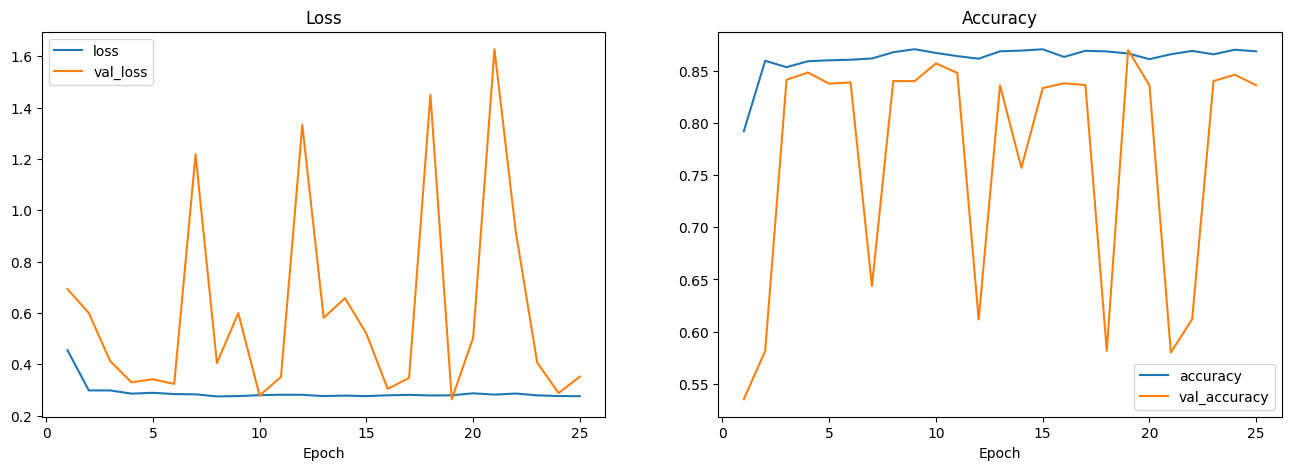

In [63]:
epoch=25

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history2.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history2.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history2.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history2.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

# MODEL ANN FUNCTIONAL IMPROVEMENT

In [88]:
alp = 10
inp = X_train_transformed.shape[1]
out = 1
hid = int(len(test_tr)/(alp*(inp+out)))
hid2 = hid-22
print(f'Jumlah neuron pada hidden layer: {hid2}')

inputs = tf.keras.Input(shape=(inp,))

x = tf.keras.layers.Dense(inp, activation='tanh',kernel_initializer='HeNormal')(inputs)
x = tf.keras.layers.Dense(hid2, activation='tanh',kernel_initializer='HeNormal')(x)
x = tf.keras.layers.Dense(hid2, activation='tanh',kernel_initializer='HeNormal')(x) # additional hidden layer
x = tf.keras.layers.Dense(hid2, activation='tanh',kernel_initializer='HeNormal')(x) # additional hidden layer
outputs = tf.keras.layers.Dense(out, activation='sigmoid')(x)

modelfuncimp = tf.keras.Model(inputs=inputs, outputs=outputs)
modelfuncimp.summary()


Jumlah neuron pada hidden layer: 4
Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 25)]              0         
                                                                 
 dense_61 (Dense)            (None, 25)                650       
                                                                 
 dense_62 (Dense)            (None, 4)                 104       
                                                                 
 dense_63 (Dense)            (None, 4)                 20        
                                                                 
 dense_64 (Dense)            (None, 4)                 20        
                                                                 
 dense_65 (Dense)            (None, 1)                 5         
                                                                 
Total params: 799
Traina

In [89]:
modelfuncimp.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy','Recall'])

In [90]:
history3 = modelfuncimp.fit(train_pipe, epochs=50, validation_data=val_pipe, callbacks=[early_stopping])

Epoch 1/50


2023-02-07 15:35:10.818161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 0.8649 - accuracy: 0.4672 - recall: 0.0743

2023-02-07 15:35:12.748896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 3s 19ms/step - loss: 0.8649 - accuracy: 0.4672 - recall: 0.0743 - val_loss: 0.7393 - val_accuracy: 0.4679 - val_recall: 0.0779
Epoch 2/50
125/125 [==============================] - 2s 12ms/step - loss: 0.7101 - accuracy: 0.4727 - recall: 0.0956 - val_loss: 0.6992 - val_accuracy: 0.4819 - val_recall: 0.1899
Epoch 3/50
125/125 [==============================] - 2s 12ms/step - loss: 0.6963 - accuracy: 0.5253 - recall: 0.8282 - val_loss: 0.6952 - val_accuracy: 0.5343 - val_recall: 0.9875
Epoch 4/50
125/125 [==============================] - 2s 12ms/step - loss: 0.6937 - accuracy: 0.5351 - recall: 0.9874 - val_loss: 0.6935 - val_accuracy: 0.5346 - val_recall: 0.9888
Epoch 5/50
125/125 [==============================] - 2s 12ms/step - loss: 0.6923 - accuracy: 0.5356 - recall: 0.9893 - val_loss: 0.6924 - val_accuracy: 0.5354 - val_recall: 0.9910
Epoch 6/50
125/125 [==============================] - 1s 12ms/step - loss: 0.6913 - accuracy: 0.5359 - rec

Text(0.5, 0, 'Epoch')

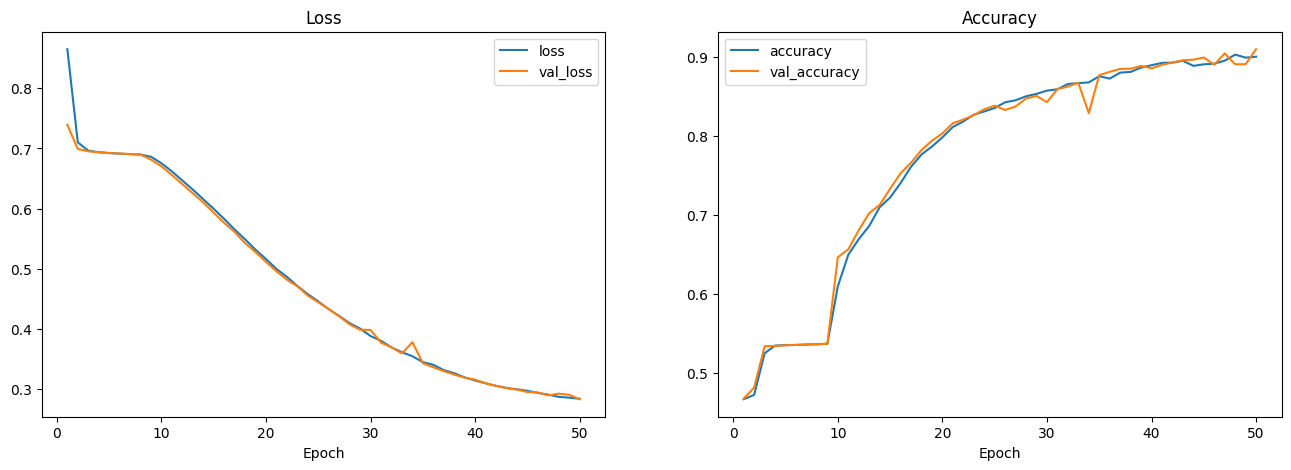

In [91]:
epoch=50

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history3.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history3.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history3.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history3.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

# MODEL SAVING

In [68]:
with open('preprocessor', 'wb') as file_1:
  joblib.dump(preprocessor, file_1)
  modelfuncimp.save('bestmodel.h5')